In [1]:
import sys
sys.path.append("D:\zlketang")
import pandas as pd

# 业务沟通

这是做播报的第一步，先和需求方好好沟通，明确他到底想要什么，搞清楚他的业务逻辑，因为教务、销售、市场的业务是完全不同的。  
在明确业务后，要搞清楚数据逻辑，就是在哪里获取需要的数据，比如有的是在大数据集群、有的在神策、有的在213的mysql，  
有的是在飞书的电子表格上，还有的是通过研发的接口获取，或者是以上来源的某些组合，总之明白数据在哪里。  
之后就是确定播报的图片样式，确定播报的时间等等。

# 获取数据

## 获取105或107大数据集群上的数据  
- 以105 hive 存放的虎鲸数据为例

In [2]:
# 导入类
from tools.hive.HiveHandle_v2 import HiveHandle
# 实例化对象，并指定数据库为 users
hive1 = HiveHandle(database='users')
# 调用方法执行sql查询
df = hive1.select_data('''
show tables
''')
# 关闭连接
hive1.close()

hive_url：jdbc:hive2://192.168.50.107:10001/users
成功建立hive数据链接！
成功获取数据，数据量为：(5, 1)


In [3]:
df

,tab_name
0,add_friend
1,hujing_houtai
2,hujing_increase
3,hujing_orgin
4,users1


## 获取215神策大数据集群上的数据

In [4]:
# 导入类
from tools.shence.ShenceHandle import ShenceHandle
# 实例化对象，这里不用指定database
shence_hive = ShenceHandle()
# 执行查询sql
df = shence_hive.select_data('''
select event,distinct_id unionid, 
       date, pt, nickname, user_num
from events
where event='register_success'  and date='2021-11-11'
LIMIT 5
/*SA(default)*/   
''')
# 关闭连接
shence_hive.close()

In [5]:
df

,event,unionid,date,pt,nickname,user_num
0,register_success,ovsuXw7Zb9iHRgZmEQfovM3Ia5jw,2021-11-11 00:00:00,wxpub,百搭迷你,ASU3RFK
1,register_success,ovsuXw7IoZwLiYE-tWJ5OM2o4KF4,2021-11-11 00:00:00,wxpub,大唐唐,C3U3RC4
2,register_success,ovsuXwx6W61678ZU6iacHCQojxSA,2021-11-11 00:00:00,wxpub,小慌崽崽:-D,C7U3RFS
3,register_success,ovsuXw8mJNfmFTKjkTPe22TK8yZg,2021-11-11 00:00:00,wxpub,None,CBU3REK
4,register_success,ovsuXw0jKb_TJSuigQ1F2ux-71UM,2021-11-11 00:00:00,wxmini,Mi Manchiᥬᥬᩤᩤ,BMU3RAX


## 获取飞书上的电子表格的数据
- 先确定url:https://jjyajw46qj.feishu.cn/sheets/shtcnYtmOh4N8fH5Fs0DyFawNGd?sidebarOpen=1%3Ffrom%3DEXPANDED_SIDE_BAR

In [6]:
# 指定工作簿
link = 'shtcnYtmOh4N8fH5Fs0DyFawNGd'

In [7]:
# 指定表名
sheet_name = 'dAuOlq'

In [8]:
# 指定要获取的区域
range_list = [sheet_name+"!B4:C5"]
range_list

['dAuOlq!B4:C5']

In [9]:
from tools.feishu.FeishuSpreadSheet import FeishuSpreadSheet
feishu = FeishuSpreadSheet()
# 传入相应的参数
data_json = feishu.read_multiple_ranges_data(spread_sheet_token=link, ranges_list=range_list)
# 返回json格式
df = pd.DataFrame(data_json.get('valueRanges')[0]['values'])

获取飞书tenant_access_token： t-9c6e4d38eed3ab0850aac75d9e3ac5bb8af87fcd
获取数据成功！


In [10]:
df

,0,1
0,a,b
1,c,d


## 获取213里面的mysql上的数据

In [15]:
from tools.mysql.MysqlHandle import MysqlHandle
# database可以指定，默认是 shencerigeng
mysql213 = MysqlHandle(database='yunying_data')
df = mysql213.select_data('''
select date_str, profession_name, sum(active_num) active_num from de_active_num
where date_str in (select max(date_str ) from de_active_num)
group by date_str, profession_name 
order by date_str, profession_name 
''')
mysql213.close()

In [16]:
df

,date_str,profession_name,active_num
0,2021-11-14,中级会计职称,266.0
1,2021-11-14,会计实操,92.0
2,2021-11-14,初级会计职称,3636.0
3,2021-11-14,注册会计师,159.0
4,2021-11-14,税务师,66.0
5,2021-11-14,管理会计,12.0


## excel、csv、txt等数据  
- pd.read_csv()
- pd.read_excel()
- 其他略

# 数据清洗、处理、计算

主要涉及python基础和pandas,整理出最终的结果。

# 数据填入excel  
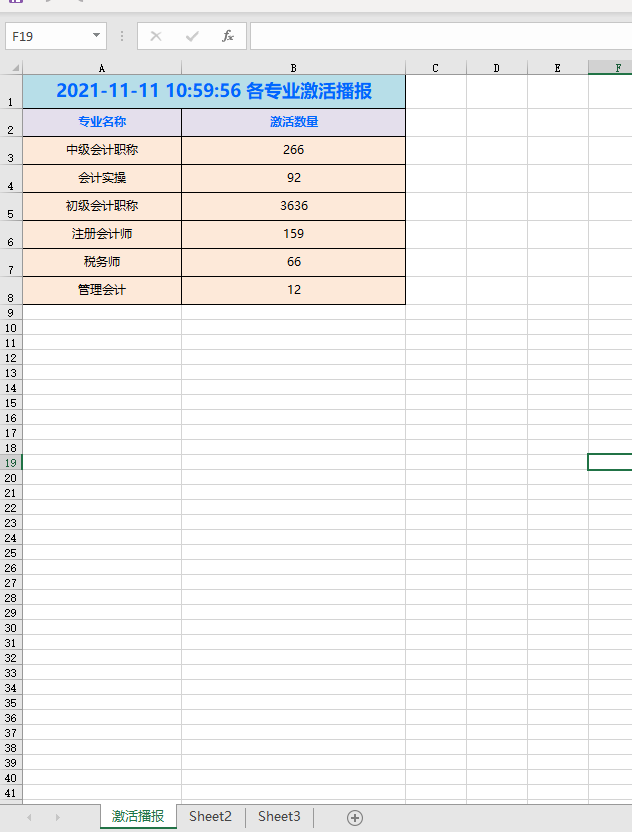

In [20]:
from openpyxl import load_workbook

In [21]:
# 导入工作簿
excel_file = load_workbook(r"D:\罗亚雄\04 数据核查汇总平时取数需求\31 钉钉数据播报培训\最近一天每个专业激活数据.xlsx")

In [22]:
# 指定sheet
sheet1 = excel_file["激活播报"]

In [30]:
sheet1.cell(1, 1).value

'2021-11-11 10:59:56 各专业激活播报'

In [31]:
import datetime

In [32]:
now = datetime.datetime.now()

In [35]:
now.strftime('%Y-%m-%d %H:%M:%S')+' 各专业激活播报'

'2021-11-15 13:34:13 各专业激活播报'

In [36]:
sheet1.cell(1, 1).value = now.strftime('%Y-%m-%d %H:%M:%S')+' 各专业激活播报'

In [47]:
val = df[['profession_name', 'active_num']].values.tolist()
val

[['中级会计职称', 266.0],
 ['会计实操', 92.0],
 ['初级会计职称', 3636.0],
 ['注册会计师', 159.0],
 ['税务师', 66.0],
 ['管理会计', 12.0]]

In [49]:
del df['date_str']

In [50]:
df

,profession_name,active_num
0,中级会计职称,266.0
1,会计实操,92.0
2,初级会计职称,3636.0
3,注册会计师,159.0
4,税务师,66.0
5,管理会计,12.0


In [51]:
start, end=3, 1
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        sheet1.cell(i+start, j+end).value=val[i][j]

In [52]:
excel_file.save(r"D:\罗亚雄\04 数据核查汇总平时取数需求\31 钉钉数据播报培训\播报{}.xlsx".format(now.strftime('%Y%m%d%H%M%S')))
excel_file.close()

# excel截图

In [53]:
from tools.excel.excel_pic import excel_catch_screen

In [54]:
excel_catch_screen(filename = r"D:\罗亚雄\04 数据核查汇总平时取数需求\31 钉钉数据播报培训\播报{}.xlsx".format(now.strftime('%Y%m%d%H%M%S')),   # excel文件路径
                   sheetname = "激活播报",                             # 指定表
                   screen_area = "A1:B9",                           # 指定单元格区域
                   img_name=r".\test.png")                            # 指定图片保持路径

# 图片上传服务器

In [55]:
from tools.excel.up_pic import up_pic

In [58]:
url = up_pic(r"D:\罗亚雄\04 数据核查汇总平时取数需求\31 钉钉数据播报培训\test.png")

{'url': 'http://testcdn.zlketang.com/data_center/2021_11_15/1636955126.png'}
D:\罗亚雄\04 数据核查汇总平时取数需求\31 钉钉数据播报培训\test.png图片上传成功，返回链接： http://testcdn.zlketang.com/data_center/2021_11_15/1636955126.png


![](http://testcdn.zlketang.com/data_center/2021_11_15/1636955126.png)

# 钉钉播报

In [60]:
from tools.roboot.dingding_roboot import dingding_send

In [61]:
pagrem = {
    "msgtype": "markdown",
    "markdown": {
        "title": "数据工具人",
        "text": "#### 教务激励播报 {} ![screenshot]({})\n".format((now).strftime('%Y{y}%m{m}%d{d} %H{H}%M{M}')\
                                                         .format(y='年', m='月', d='日', H='时', M="分"),
                    url)
    },
}
dingding_send(access_token="5b14b76adad07c0bc7cc26285e865e54e049e157976cd0cba7f5e221a534ca4d", data=pagrem)

D:\Anaconda3\envs\luoyaxiong\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'oapi.dingtalk.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
钉钉机器人播报成功!


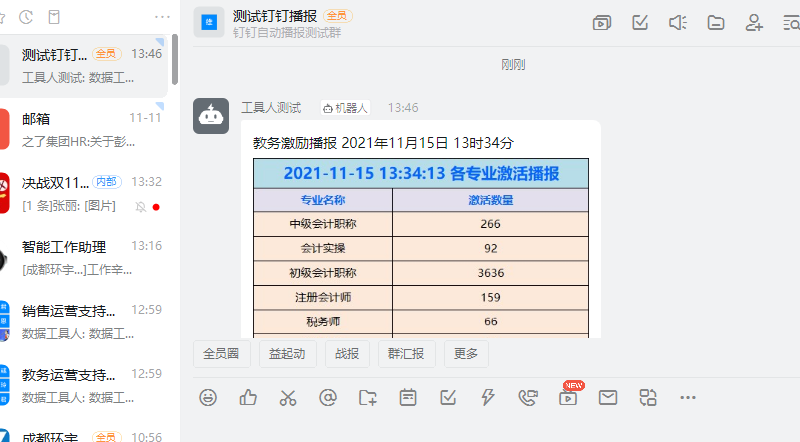